In [1]:
from scipy import ndimage
from scipy import misc
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

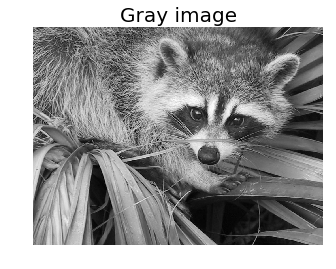

In [2]:
gray_image = misc.face(gray=True)

plt.imshow(gray_image, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Gray image', fontsize=20)
plt.show()

In [3]:
def bin_image(image):
    b = image
    for i in range(len(image[:,1])):
        for j in range(len(image[1,:])):
            b[i][j] /= 16
            b[i][j] *= 16
    return b

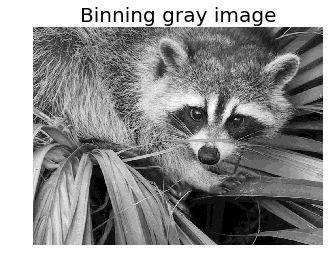

In [4]:
bin_gray_image = bin_image(misc.face(gray=True))

plt.imshow(bin_gray_image, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Binning gray image', fontsize=20)
plt.show()

In [5]:
dx = [-1, 0, 1, 1]
dy = [1, 1, 1, 0]

def calculate_occurrence_matrix(image, d):
    c = 256 / d
    m = np.zeros([d, d], int)
    for i in range(len(image[:,1])):
        for j in range(len(image[1,:])):
            p1 = image[i][j]
            for k in range(4):
                p2 = image[(i + dx[k]) % len(image[:,1])][(j + dy[k]) % len(image[1,:])]
                m[int(p1 / c)][int(p2 / c)] += 1
                m[int(p2 / c)][int(p1 / c)] += 1
    return m

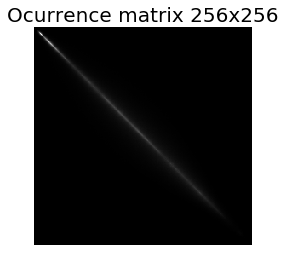

In [8]:
ocurrence_matrix = calculate_occurrence_matrix(gray_image, 256)
plt.imshow(ocurrence_matrix, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Ocurrence matrix 256x256', fontsize=20)
plt.show()

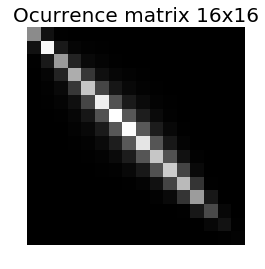

In [9]:
bin_ocurrence_matrix = calculate_occurrence_matrix(bin_gray_image, 16)
plt.imshow(bin_ocurrence_matrix, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Ocurrence matrix 16x16', fontsize=20)
plt.show()